# Lab 14: Random numbers and Monte Carlo integration

In this lab, we will look at integration using so-called *Monte Carlo* methods, which rely on random (or *pseudorandom*) numbers. In the process, we’ll discover more about how to generate these numbers and what else they can be used for.

## Pseudorandom numbers

Recall that a simple pseudorandom number generator follows the formula: $r_{i+1} = (ar_i + c) \mod M$, with $a$, $c$, and $M$ specified. This gives integers between 0 and $M-1$, so we divide by $M$ to get floating-point numbers in the range $[0,1)$. In Python, the modulo (“remainder”) operator is `%`.

We’ll start by using the values $M = 2^8$, $c = 1$, $a = 57$, and begin iterating with $r_0 = 10$.

**Determine the period of this generator:** that is, how many values does it generate before returning to the starting point $r = 10$?

In [2]:
M, c, a, r = 2**8,1,57,10
n = 0
while r != 10 or n == 0:
    r = ((a*r) + c)%(M)
    n += 1
print(n)

256


**Plot the values in pairs:** that is, $(r_0, r_1)$, $(r_2, r_3)$, and so forth. Explain why this may not be a suitable random number generator for serious use.

<IPython.core.display.Javascript object>


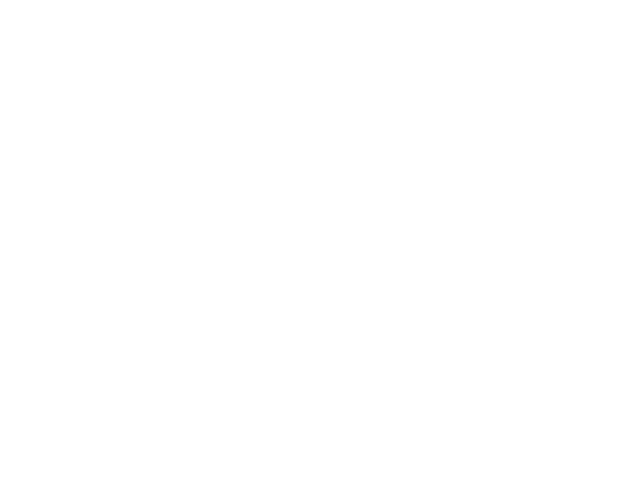

1.0


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, vstack
from numpy.linalg import eig
%matplotlib notebook
M, c, a, r = 2**8,1,57,10
n = 0
plt.figure()
while r != 10 or n == 0:
    r1 = r/256
    r = ((a*r) + c)%(M)
    r2 = r 
    n += 1/256
    plt.plot(r1,r2,'ob')
print(n)

**Make another version of the plot** this time using the more realistic values $M = 2^{48}$, $c = 11$, $a = 25 214 903 917$.

<IPython.core.display.Javascript object>


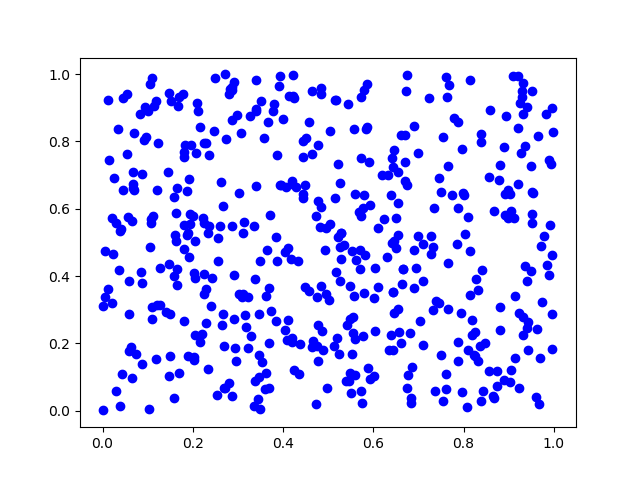

In [13]:

M, c, a, r = 2**48,11,25214903917,10
n = 0
plt.figure()
for i in range(500):
    r1 = r
    r = ((a*r) + c)%(M)
    r2 = r
    n += 1
    plt.plot(r1/M,r2/M,'ob')
 


▶ **CHECKPOINT 1**

## Interlude: more on `array`s

In practice, it’s almost always best to use pseudorandom number generators written by experts. Our pseudorandom numbers will be generated using the `scipy.random` module, which returns these numbers as `array`s. We’ll need two useful methods of this data type.

First, the `reshape` method changes the shape of an array, while keeping the individual elements and their order:

In [1]:
from numpy import array
x = array([1,2,3,4,5,6])
y = x.reshape(3,2)
print(y)

[[1 2]
 [3 4]
 [5 6]]


A very useful feature is that you can make one argument equal to -1; then that dimension will simply be whatever size is necessary to accommodate the rest of the array. For instance, here we say that we want two columns and however many rows are needed:

In [2]:
x = array([1,2,3,4,5,6])
y = x.reshape(-1,2)
print(y)

[[1 2]
 [3 4]
 [5 6]]


Second, the `sum` method by default adds up every number in an array, but can be restricted to do so along a particular axis:

In [3]:
print("Sum all:")
print(y.sum())

print("Sum along columns:")
print(y.sum(axis=0))

print("Sum along rows:")
print(y.sum(axis=1))

Sum all:
21
Sum along columns:
[ 9 12]
Sum along rows:
[ 3  7 11]


## Monte Carlo integration

We’ll start by evaluating a very simple integral, to which we know the answer:
$$
\int_0^1x^2\,\mathrm dx  = \tfrac13.
$$

Recall that the way to do this by the Monte Carlo method is to take random points inside the integration boundaries, here $0\leq x \leq 1$. We then take the average of the function to be integrated, evaluated at each of these points.

**Import the `random` module:**

In [4]:
from scipy import random

Use the `random.random()` function to **generate 100 numbers between 0 and 1**. *Hint:* you will need to use the `size` argument; consult the documentation if necessary to see how this works.

In [5]:
y = random.random(100)

Since we are integrating $x^2$, **square these numbers**. Then **calculate the average**. How close is your answer to the expected value?

In [6]:
print("square of the Sum:",(y**2).sum())
print("average of squared sum:",(y**2).sum()/len(y))
print("difference between average of y and expected value", abs((y**2).sum()/len(y)-(1/3)))


square of the Sum: 33.358470696908384
average of squared sum: 0.3335847069690838
difference between average of y and expected value 0.000251373635750507


▶ **CHECKPOINT 2**

The following 21-dimensional integral looks forbidding, but it can be tackled in exactly the same way:
$$
\int_0^1\cdots\int_0^1\big(x_1 + x_2 + x_3 + \cdots + x_{21}\big)^2\,\mathrm dx_1 \dots \mathrm dx_{21}.
$$
Its value turns out to be exactly equal to 112 (this is not such a difficult thing to prove if you would like to have a go!). 

Here the integration boundaries are a hypercube where $x_1$, $x_2$, etc. all take values between 0 and 1. We need to take the average of the function to be integrated, $(x_1 + x_2 + x_3 + \cdots + x_{21})^2$, evaluated at each of these points.

Use the `random.random()` function to **generate 210 numbers between 0 and 1**. 

Use `reshape` to **change this into an array with 21 columns** (and therefore ten rows), which we will interpret as a set of ten points in 21-dimensional space.

Use `sum` to **calculate $(x_1 + x_2 + x_3 + \cdots + x_{21})^2$ at each point**: your result should be an array of 10 values, one for each point.

**Calculate the average of this array**, which is our Monte Carlo estimate of the integral.

In [17]:
ran = random.random(10000000*21)
ranx = ran.reshape(21, -1)
ransq = (ranx.sum(axis=0))**2
print("Monte Carlo esimate of the integral", sum(ransq)/len(ransq))

Monte Carlo esimate of the integral 111.99679575939544


**Repeat your calculation** with more data points. **Plot the relative error in the integral** as a function of the number of data points, on a log-log scale. Are your results consistent with the theoretical result that the error should scale with $1/\sqrt{N}$? 

J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


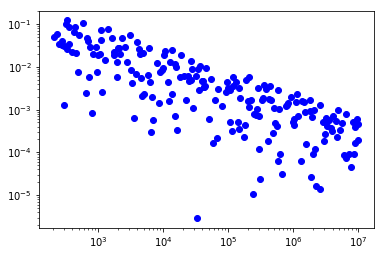

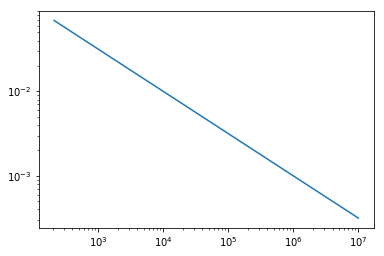

In [18]:
def myround(x, base=5):
    return int(base * round(float(x)/base))

def rand(x):
    ran = random.random(int(x))
    ranx = ran.reshape(-1,21)
    ransq = (ranx.sum(axis=1))**2
    return sum(ransq)/len(ransq)

pop = np.logspace(2.32,7,400)
plt.figure()
for i in pop:
    p = myround(i,21)
    estimate = rand(p)
    relative_error = (estimate-112)/112
    plt.loglog(p ,relative_error,'ob')
plt.figure()
plt.loglog(pop, 1/np.sqrt(pop))

**Evaluate the error** of a calculation with $N=21\times10^5$. If you tried to do a trapezoid rule calculation with approximately the same number of points, where would you end up evaluating the function? Can you see why the Monte Carlo method will almost certainly give a better result?

In [19]:
Mo = rand(21e5)
Mo_relative_error = (Mo-112)/122
print(Mo_relative_error)

-8.377908656621562e-05


(*Extension:* actually evaluate the trapezoid-rule value. You might want to talk to a demonstrator about how to generate the required points; I used the `product` function from the `itertools` module.)

In [20]:
def myround(x, base=5):
    return int(base * round(float(x)/base))
pop = np.logspace(2.32,3)
print(pop)
pop1 = []
for i in pop:
    pop1.append(myround(i,21))
print(pop1)

[ 208.92961309  215.71361206  222.71788925  229.94959715  237.41612048
  245.12508377  253.08435911  261.3020742   269.78662063  278.5466625
  287.59114521  296.92930463  306.57067652  316.52510627  326.80275894
  337.41412968  348.37005438  359.68172082  371.36068001  383.41885806
  395.86856828  408.72252384  421.99385069  435.69610097  449.8432669
  464.44979498  479.53060084  495.1010844   511.17714562  527.77520073
  544.91219901  562.60564009  580.87359182  599.7347087   619.20825096
  639.31410421  660.07279975  681.50553555  703.63419786  726.48138361
  750.07042342  774.42540551  799.57120021  825.53348542  852.33877279
  880.01443483  908.58873283  938.09084572  968.55089991 1000.        ]
[210, 210, 231, 231, 231, 252, 252, 252, 273, 273, 294, 294, 315, 315, 336, 336, 357, 357, 378, 378, 399, 399, 420, 441, 441, 462, 483, 504, 504, 525, 546, 567, 588, 609, 609, 630, 651, 672, 714, 735, 756, 777, 798, 819, 861, 882, 903, 945, 966, 1008]


▶ **CHECKPOINT 3**